In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_parquet("../data/results_seed_18/analysis/ratings_pooled.parquet")
df.head(10)

,strategy,mu,sigma
0,"Strat(850,2)[SD][--FS][AND][H-]",25.545818,0.000102
1,"Strat(900,4)[SD][F-FS][OR][-R]",28.714925,0.000103
2,"Strat(1150,2)[SD][FOFS][OR][H-]",28.159075,0.000102
3,"Strat(500,3)[SD][FOFD][OR][-R]",28.865769,0.000102
4,"Strat(450,3)[SD][--FS][AND][-R]",28.488439,0.000102
5,"Strat(1250,4)[SD][FOFD][AND][H-]",23.856213,0.000103
6,"Strat(700,1)[SD][FOFS][AND][HR]",19.893357,0.000109
7,"Strat(250,2)[SD][F-FD][AND][-R]",28.873115,0.000103
8,"Strat(800,2)[SD][FOFS][OR][H-]",28.465412,0.000102
9,"Strat(1300,0)[SD][F-FS][OR][H-]",23.537093,0.000103


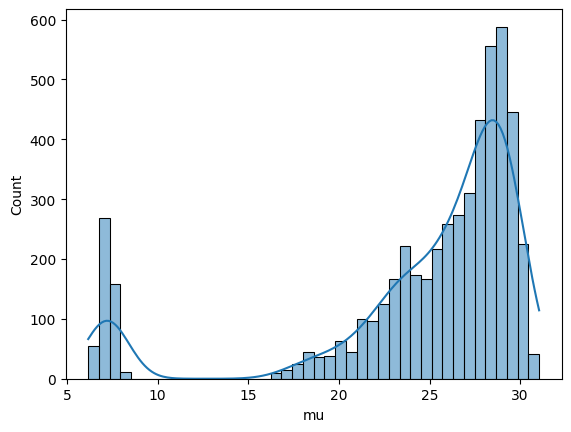

In [2]:
sns.histplot(df['mu'], kde=True)
# plt.title('Distribution of mu')
plt.show()

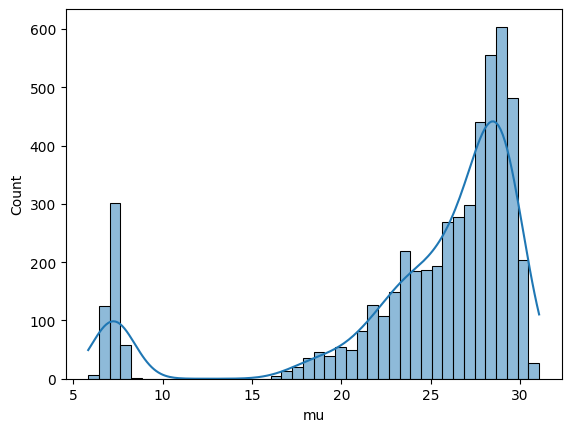

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df2 = pd.read_parquet("../data/results_seed_19/analysis/ratings_pooled.parquet")
sns.histplot(df2['mu'], kde=True)
# plt.title('Distribution of mu')
plt.show()

In [4]:
df2.rename(columns={"mu":"mu2", "sigma":"sigma2"}, inplace=True)

In [5]:
df2.head(5)

,strategy,mu2,sigma2
0,"Strat(1050,-1)[S-][--FS][OR][HR]",24.994744,0.000102
1,"Strat(550,1)[SD][FOFD][OR][HR]",28.146239,0.000103
2,"Strat(950,3)[SD][--FS][OR][-R]",28.232778,0.000102
3,"Strat(1000,0)[SD][F-FS][OR][--]",24.040405,0.000103
4,"Strat(400,-1)[S-][--FS][OR][HR]",28.429609,0.000102


In [15]:
df_both = pd.merge(df, df2, on="strategy")
df_both.head(5)

,strategy,mu,sigma,mu2,sigma2
0,"Strat(850,2)[SD][--FS][AND][H-]",25.545818,0.000102,25.422595,0.000103
1,"Strat(900,4)[SD][F-FS][OR][-R]",28.714925,0.000103,28.311739,0.000102
2,"Strat(1150,2)[SD][FOFS][OR][H-]",28.159075,0.000102,27.881083,0.000103
3,"Strat(500,3)[SD][FOFD][OR][-R]",28.865769,0.000102,28.977595,0.000102
4,"Strat(450,3)[SD][--FS][AND][-R]",28.488439,0.000102,28.440113,0.000102


In [7]:
df

,strategy,mu,sigma
0,"Strat(850,2)[SD][--FS][AND][H-]",25.545818,0.000102
1,"Strat(900,4)[SD][F-FS][OR][-R]",28.714925,0.000103
2,"Strat(1150,2)[SD][FOFS][OR][H-]",28.159075,0.000102
3,"Strat(500,3)[SD][FOFD][OR][-R]",28.865769,0.000102
4,"Strat(450,3)[SD][--FS][AND][-R]",28.488439,0.000102
...,...,...,...
5155,"Strat(200,4)[SD][F-FS][AND][-R]",29.588043,0.000102
5156,"Strat(350,0)[SD][FOFD][OR][-R]",27.993162,0.000102
5157,"Strat(450,-1)[S-][F-FS][OR][-R]",25.564129,0.000102
5158,"Strat(1100,3)[SD][F-FS][AND][H-]",24.315063,0.000103


In [8]:
df2

,strategy,mu2,sigma2
0,"Strat(1050,-1)[S-][--FS][OR][HR]",24.994744,0.000102
1,"Strat(550,1)[SD][FOFD][OR][HR]",28.146239,0.000103
2,"Strat(950,3)[SD][--FS][OR][-R]",28.232778,0.000102
3,"Strat(1000,0)[SD][F-FS][OR][--]",24.040405,0.000103
4,"Strat(400,-1)[S-][--FS][OR][HR]",28.429609,0.000102
...,...,...,...
5155,"Strat(500,0)[SD][F-FD][OR][HR]",28.352143,0.000102
5156,"Strat(650,3)[SD][F-FD][AND][HR]",27.209002,0.000103
5157,"Strat(1000,1)[SD][F-FS][OR][HR]",27.517689,0.000103
5158,"Strat(800,2)[SD][F-FS][AND][-R]",25.017638,0.000102


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strategy  5160 non-null   object 
 1   mu        5160 non-null   float64
 2   sigma     5160 non-null   float64
dtypes: float64(2), object(1)
memory usage: 121.1+ KB


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strategy  5160 non-null   object 
 1   mu2       5160 non-null   float64
 2   sigma2    5160 non-null   float64
dtypes: float64(2), object(1)
memory usage: 121.1+ KB


In [16]:
df_both["delta_mu"] = df_both["mu"]-df_both["mu2"]

In [17]:
df_both["average_sigma"] = (df_both["sigma"] + df_both["sigma2"]) / 2

In [18]:
df_both

,strategy,mu,sigma,mu2,sigma2,delta_mu,average_sigma
0,"Strat(850,2)[SD][--FS][AND][H-]",25.545818,0.000102,25.422595,0.000103,0.123223,0.000102
1,"Strat(900,4)[SD][F-FS][OR][-R]",28.714925,0.000103,28.311739,0.000102,0.403186,0.000102
2,"Strat(1150,2)[SD][FOFS][OR][H-]",28.159075,0.000102,27.881083,0.000103,0.277992,0.000102
3,"Strat(500,3)[SD][FOFD][OR][-R]",28.865769,0.000102,28.977595,0.000102,-0.111826,0.000102
4,"Strat(450,3)[SD][--FS][AND][-R]",28.488439,0.000102,28.440113,0.000102,0.048325,0.000102
...,...,...,...,...,...,...,...
5155,"Strat(200,4)[SD][F-FS][AND][-R]",29.588043,0.000102,28.942685,0.000103,0.645358,0.000103
5156,"Strat(350,0)[SD][FOFD][OR][-R]",27.993162,0.000102,27.819993,0.000102,0.173169,0.000102
5157,"Strat(450,-1)[S-][F-FS][OR][-R]",25.564129,0.000102,25.594955,0.000103,-0.030827,0.000102
5158,"Strat(1100,3)[SD][F-FS][AND][H-]",24.315063,0.000103,24.432116,0.000103,-0.117053,0.000103


In [19]:
df_both["abs_delta_mu"] = abs(df_both["delta_mu"])

In [20]:
df_both

,strategy,mu,sigma,mu2,sigma2,delta_mu,average_sigma,abs_delta_mu
0,"Strat(850,2)[SD][--FS][AND][H-]",25.545818,0.000102,25.422595,0.000103,0.123223,0.000102,0.123223
1,"Strat(900,4)[SD][F-FS][OR][-R]",28.714925,0.000103,28.311739,0.000102,0.403186,0.000102,0.403186
2,"Strat(1150,2)[SD][FOFS][OR][H-]",28.159075,0.000102,27.881083,0.000103,0.277992,0.000102,0.277992
3,"Strat(500,3)[SD][FOFD][OR][-R]",28.865769,0.000102,28.977595,0.000102,-0.111826,0.000102,0.111826
4,"Strat(450,3)[SD][--FS][AND][-R]",28.488439,0.000102,28.440113,0.000102,0.048325,0.000102,0.048325
...,...,...,...,...,...,...,...,...
5155,"Strat(200,4)[SD][F-FS][AND][-R]",29.588043,0.000102,28.942685,0.000103,0.645358,0.000103,0.645358
5156,"Strat(350,0)[SD][FOFD][OR][-R]",27.993162,0.000102,27.819993,0.000102,0.173169,0.000102,0.173169
5157,"Strat(450,-1)[S-][F-FS][OR][-R]",25.564129,0.000102,25.594955,0.000103,-0.030827,0.000102,0.030827
5158,"Strat(1100,3)[SD][F-FS][AND][H-]",24.315063,0.000103,24.432116,0.000103,-0.117053,0.000103,0.117053


In [21]:
df_both["icv"] = df_both["abs_delta_mu"] / df_both["average_sigma"]

In [24]:
df_both.describe()

,mu,sigma,mu2,sigma2,delta_mu,average_sigma,abs_delta_mu,icv
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,24.651062,0.000107,24.648960,0.000108,0.002102,0.000108,0.299672,2788.657340
std,6.333526,0.000013,6.321696,0.000013,0.378458,0.000013,0.231115,2117.444071
min,6.167772,0.000101,5.832891,0.000101,-1.623485,0.000101,0.000124,1.217280
25%,23.443865,0.000102,23.446091,0.000103,-0.249917,0.000102,0.119119,1112.766239
50%,26.928888,0.000103,26.943602,0.000103,0.005745,0.000103,0.251902,2358.691649
75%,28.685394,0.000104,28.684293,0.000104,0.253407,0.000104,0.429161,4012.572400
max,31.045272,0.000155,31.066929,0.000154,1.897548,0.000152,1.897548,13527.145050


In [25]:
df_both["average_mu"] = (df_both["mu"] + df_both["mu2"]) / 2

<Axes: xlabel='average_sigma', ylabel='abs_delta_mu'>

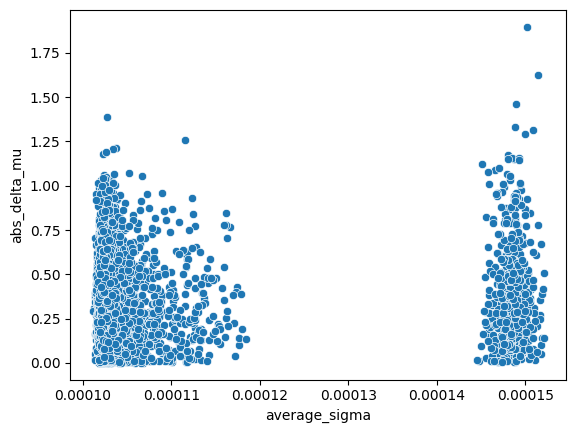

In [30]:
sns.scatterplot(df_both, x="average_sigma", y="abs_delta_mu")

In [31]:
df_both["mu_percent_change"] = df_both["abs_delta_mu"] / df_both["mu"]

<Axes: xlabel='mu', ylabel='mu_percent_change'>

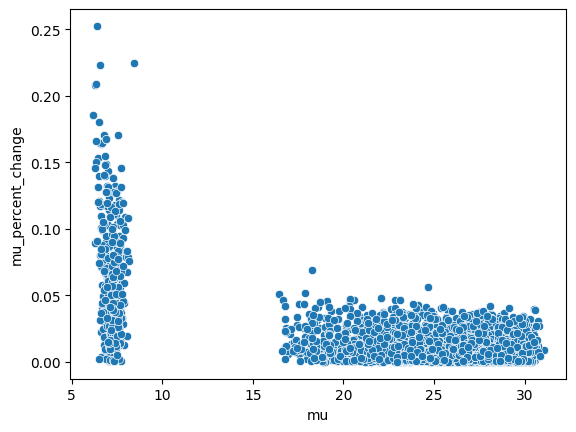

In [32]:
sns.scatterplot(df_both, x="mu", y="mu_percent_change")

<Axes: xlabel='mu_percent_change', ylabel='Count'>

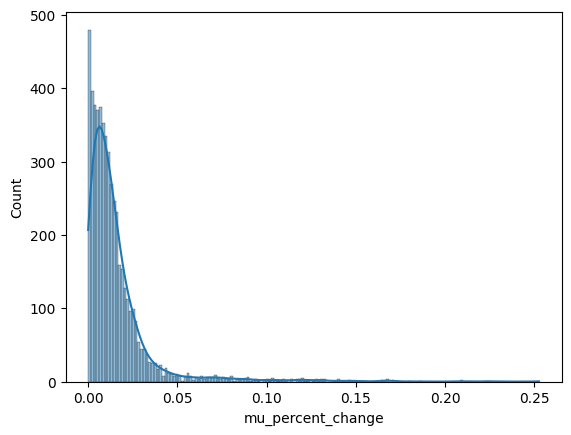

In [35]:
sns.histplot(df_both, x="mu_percent_change", kde=True)

In [34]:
df_both.describe()

,mu,sigma,mu2,sigma2,delta_mu,average_sigma,abs_delta_mu,icv,average_mu,mu_percent_change
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,24.651062,0.000107,24.648960,0.000108,0.002102,0.000108,0.299672,2788.657340,24.650011,0.015349
std,6.333526,0.000013,6.321696,0.000013,0.378458,0.000013,0.231115,2117.444071,6.324784,0.020465
min,6.167772,0.000101,5.832891,0.000101,-1.623485,0.000101,0.000124,1.217280,6.340541,0.000005
25%,23.443865,0.000102,23.446091,0.000103,-0.249917,0.000102,0.119119,1112.766239,23.465562,0.004731
50%,26.928888,0.000103,26.943602,0.000103,0.005745,0.000103,0.251902,2358.691649,26.927707,0.010218
75%,28.685394,0.000104,28.684293,0.000104,0.253407,0.000104,0.429161,4012.572400,28.678713,0.018001
max,31.045272,0.000155,31.066929,0.000154,1.897548,0.000152,1.897548,13527.145050,30.911753,0.252626


In [38]:
!pip install -e ./..

Obtaining file:///S:/Libraries/OneDrive/Documents/Code%20Projects%20Parent%20Folder/Code%20Projects/Farkle%20Mk%20II
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for farkle (pyproject.toml): started
  Building editable for farkle (pyproject.toml): finished with status 'done'
  Created wheel for farkle: filename=farkle-0.8.0-py3-none-any.whl size=11753 sha256=b5bada41546f4c97260be0536970826f0f47ff1c502013812eb29a2d2d64e5


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
# from farkle.analysis import ingest, curate

seeds = [18, 19, 20, 21]
n_players_list = [2, 3, 4, 5, 6, 8, 10, 12]
data_loc_str = [f"data/results_seed_{i}" for i in seeds]
print(data_loc_str)
subfolders_str = [f"{i}_players/{i}p_metrics.parquet" for i in n_players_list]
print(subfolders_str)
all_parquet_paths = [f"../{i}/{j}" for i in data_loc_str for j in subfolders_str]
print(all_parquet_paths)

['data/results_seed_18', 'data/results_seed_19', 'data/results_seed_20', 'data/results_seed_21']
['2_players/2p_metrics.parquet', '3_players/3p_metrics.parquet', '4_players/4p_metrics.parquet', '5_players/5p_metrics.parquet', '6_players/6p_metrics.parquet', '8_players/8p_metrics.parquet', '10_players/10p_metrics.parquet', '12_players/12p_metrics.parquet']
['../data/results_seed_18/2_players/2p_metrics.parquet', '../data/results_seed_18/3_players/3p_metrics.parquet', '../data/results_seed_18/4_players/4p_metrics.parquet', '../data/results_seed_18/5_players/5p_metrics.parquet', '../data/results_seed_18/6_players/6p_metrics.parquet', '../data/results_seed_18/8_players/8p_metrics.parquet', '../data/results_seed_18/10_players/10p_metrics.parquet', '../data/results_seed_18/12_players/12p_metrics.parquet', '../data/results_seed_19/2_players/2p_metrics.parquet', '../data/results_seed_19/3_players/3p_metrics.parquet', '../data/results_seed_19/4_players/4p_metrics.parquet', '../data/results_seed

In [58]:
# --- Parameters --------------------------------------------------------------
from pathlib import Path

# Directory setup
NOTEBOOK_DIR = Path.cwd()
PROJECT_ROOT = NOTEBOOK_DIR if (NOTEBOOK_DIR / "configs").exists() else NOTEBOOK_DIR.parent

# Config + data selection
CONFIG_PATH = PROJECT_ROOT / "configs" / "farkle_mega_config.yaml"
SEEDS = [18, 19, 20, 21]
PLAYER_COUNTS = [2, 3, 4, 5, 6, 8, 10, 12]
DATA_ROOT = PROJECT_ROOT / "data"    # base folder that holds results_seed_* directories
CACHE_PARQUET = NOTEBOOK_DIR / "tmp_seed_metrics.parquet"   # set to None to skip caching

# Optional weighting across player counts (defaults to equal weights if left as None)
WEIGHTS_BY_K = None     # e.g. {2: 0.1, 3: 0.1, ...}

# Jeffreys smoothing for win rates (set False to trust raw wins/games)
USE_JEFFREYS = True
Z_STAR = 2.0     # desired z-score threshold for the MDD


In [59]:
# --- Load data + compute variance components --------------------------------
import pandas as pd

from farkle.analysis.isolated_metrics import collect_isolated_metrics, locator_from_config
from farkle.config import load_app_config
from farkle.utils.mdd import tiering_ingredients_from_df

cfg = load_app_config(CONFIG_PATH)

locator = locator_from_config(
    cfg,
    seeds=SEEDS,
    data_root=DATA_ROOT,
    player_counts=PLAYER_COUNTS,
    override_roots={seed: f"results_seed_{seed}" for seed in SEEDS},
)

print("Discovered metric files:")
for seed, mapping in locator.as_mapping().items():
    for k, path in mapping.items():
        print(f"  seed {seed} | k={k:>2} -> {path}")

combined_df, summary = collect_isolated_metrics(
    locator,
    n_jobs=cfg.analysis.n_jobs or None,
    strict=True,
)

if CACHE_PARQUET is not None:
    CACHE_PARQUET.parent.mkdir(parents=True, exist_ok=True)
    combined_df.to_parquet(CACHE_PARQUET, index=False)
    print(f"\nCached combined metrics to {CACHE_PARQUET}")

print("\nRow counts (seed × k):")
display(summary.row_counts)

print("\nStrategy counts (seed × k):")
display(summary.strategy_counts)

if summary.warnings:
    print("\nWarnings:")
    for msg in summary.warnings:
        print(" -", msg)

tier_inputs = tiering_ingredients_from_df(
    combined_df,
    wins_col="wins",
    games_col="games",
    winrate_col="winrate" if "winrate" in combined_df.columns else None,
    use_jeffreys=USE_JEFFREYS,
    weights_by_k=WEIGHTS_BY_K,
    z_star=Z_STAR,
)

components = tier_inputs["components"]
print("\nVariance components:")
print(f"  tau2_seed : {components.tau2_seed:.6f}")
print(f"  tau2_sxk  : {tier_inputs['tau2_sxk']:.6f}")
print(f"  R (seeds) : {components.R}")
print(f"  K (k levels): {components.K}")
print("  Median binomial variance by k:")
display(components.binom_by_k.to_frame(name='median_binom'))

print(f"\nPairwise MDD (win-rate points, z*={Z_STAR}): {tier_inputs['mdd']:.6f}")

cell_df = tier_inputs["cell"]
print(f"\nCombined cell DataFrame shape: {cell_df.shape}")


Discovered metric files:
  seed 18 | k= 2 -> s:\Libraries\OneDrive\Documents\Code Projects Parent Folder\Code Projects\Farkle Mk II\data\results_seed_18\2_players\2p_metrics.parquet
  seed 18 | k= 3 -> s:\Libraries\OneDrive\Documents\Code Projects Parent Folder\Code Projects\Farkle Mk II\data\results_seed_18\3_players\3p_metrics.parquet
  seed 18 | k= 4 -> s:\Libraries\OneDrive\Documents\Code Projects Parent Folder\Code Projects\Farkle Mk II\data\results_seed_18\4_players\4p_metrics.parquet
  seed 18 | k= 5 -> s:\Libraries\OneDrive\Documents\Code Projects Parent Folder\Code Projects\Farkle Mk II\data\results_seed_18\5_players\5p_metrics.parquet
  seed 18 | k= 6 -> s:\Libraries\OneDrive\Documents\Code Projects Parent Folder\Code Projects\Farkle Mk II\data\results_seed_18\6_players\6p_metrics.parquet
  seed 18 | k= 8 -> s:\Libraries\OneDrive\Documents\Code Projects Parent Folder\Code Projects\Farkle Mk II\data\results_seed_18\8_players\8p_metrics.parquet
  seed 18 | k=10 -> s:\Libraries\

k,2,3,4,5,6,8,10,12
seed,,,,,,,,
18,5160,5160,5010,4699,4673,4670,4673,4670
19,5160,5160,5016,4699,4674,4673,4670,4669
20,5160,5160,4994,4706,4674,4668,4668,4670
21,5160,5160,5027,4703,4673,4671,4672,4669



Strategy counts (seed × k):


k,2,3,4,5,6,8,10,12
seed,,,,,,,,
18,5160,5160,5010,4699,4673,4670,4673,4670
19,5160,5160,5016,4699,4674,4673,4670,4669
20,5160,5160,4994,4706,4674,4668,4668,4670
21,5160,5160,5027,4703,4673,4671,4672,4669



Warnings:
 - Strategy count mismatch for seed 18, k=4: 5010 != 5027
 - Strategy count mismatch for seed 19, k=4: 5016 != 5027
 - Strategy count mismatch for seed 20, k=4: 4994 != 5027
 - Strategy count mismatch for seed 18, k=5: 4699 != 4706
 - Strategy count mismatch for seed 19, k=5: 4699 != 4706
 - Strategy count mismatch for seed 21, k=5: 4703 != 4706
 - Strategy count mismatch for seed 18, k=6: 4673 != 4674
 - Strategy count mismatch for seed 21, k=6: 4673 != 4674
 - Strategy count mismatch for seed 18, k=8: 4670 != 4673
 - Strategy count mismatch for seed 20, k=8: 4668 != 4673
 - Strategy count mismatch for seed 21, k=8: 4671 != 4673
 - Strategy count mismatch for seed 19, k=10: 4670 != 4673
 - Strategy count mismatch for seed 20, k=10: 4668 != 4673
 - Strategy count mismatch for seed 21, k=10: 4672 != 4673
 - Strategy count mismatch for seed 19, k=12: 4669 != 4670
 - Strategy count mismatch for seed 21, k=12: 4669 != 4670

Variance components:
  tau2_seed : 0.000000
  tau2_sxk 

,median_binom
k,
2,0.000032
3,0.000036
4,0.000036
5,0.000037
6,0.000037
8,0.000036
10,0.000035
12,0.000034



Pairwise MDD (win-rate points, z*=2.0): 0.002975

Combined cell DataFrame shape: (154871, 5)
